Iris Project

In [5]:
 #Importing Library of warnings
from warnings import filterwarnings 
filterwarnings('ignore')


Read Csv file

In [6]:
#import pandas library
import pandas as pd
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Image for explanation of data
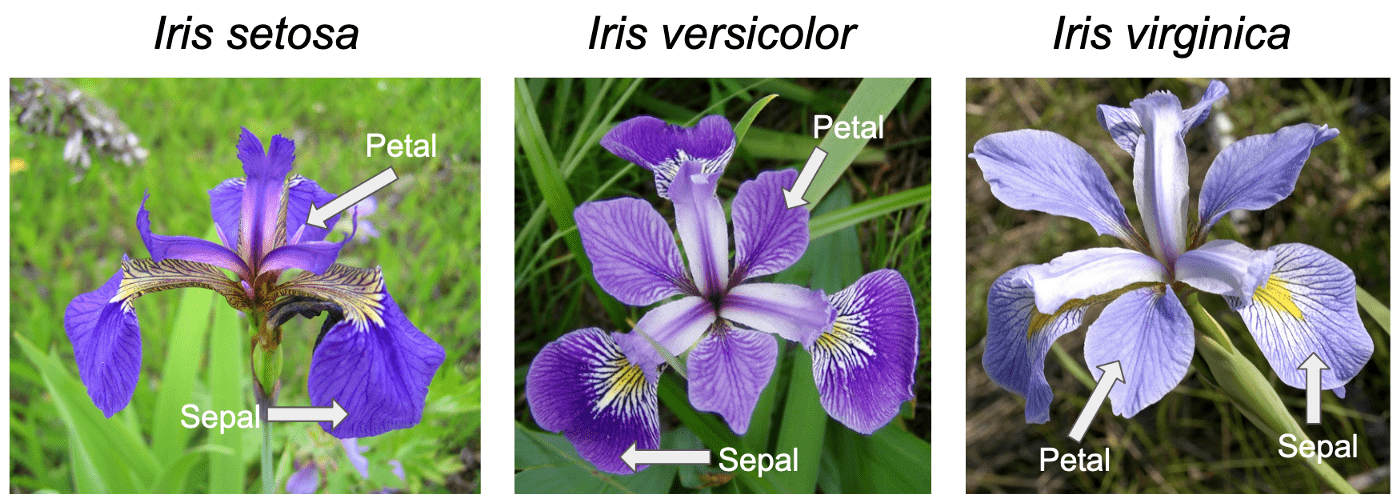

Seperate X and Y

In [7]:
x=df.drop(labels=['species'],axis=1)
y=df[['species']]

In [8]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Apply Label encoding on Y

In [11]:
#Import libarary
from sklearn.preprocessing import LabelEncoder

In [12]:
lr=LabelEncoder()
y['species']=lr.fit_transform(y['species'])

In [13]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [15]:
y.value_counts()
#setosa = 0
#versicolor = 1
#virginica = 2

species
0          50
1          50
2          50
Name: count, dtype: int64

Save LabelEncoder

In [16]:
#Import library
import pickle

In [17]:
with open('LabelEnc.pkl','wb') as file:
    pickle.dump(lr,file)

Perform Standard scaler on data

In [18]:
#Import library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_pre=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [20]:
x_pre.head()
#Scaled Values

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Save the Scaler in Pkl file.

In [21]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

Train, Test and Split

In [24]:
#Import Libarary
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.33,random_state=42)

In [26]:
xtrain.shape

(100, 4)

In [27]:
xtest.shape

(50, 4)

Create KNN Model with Hyperparameter Tuning

In [31]:
param={'n_neighbors':[3,4,5,6,7,8,9]}

In [32]:
#Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knnc=KNeighborsClassifier()
gscv=GridSearchCV(knnc,param_grid=param,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [33]:
gscv.best_params_

{'n_neighbors': 3}

In [34]:
gscv.best_score_

0.9319552669552669

In [35]:
best_knn=gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

Save the model in pkl file

In [37]:
with open('model.pkl','wb') as file:
    pickle.dump(best_knn,file)

Evaluate Model

In [38]:
#Accuracy in training
best_knn.score(xtrain,ytrain)

0.95

In [39]:
#Accuracy in Testing
best_knn.score(xtest,ytest)

0.98

Plot Confusion Matrix

In [40]:
ypred_tr=best_knn.predict(xtrain)
ypred_ts=best_knn.predict(xtest)

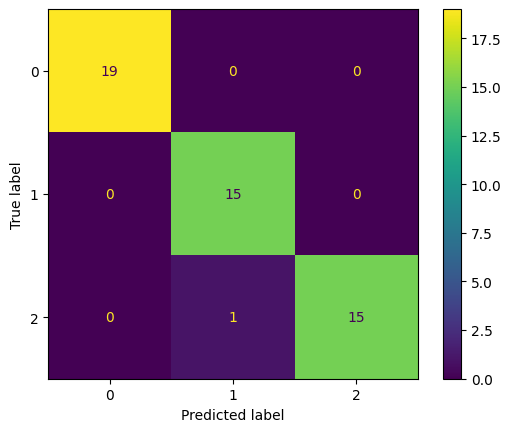

In [41]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cmd=ConfusionMatrixDisplay(cf,display_labels=best_knn.classes_)
cmd.plot()


Print the classification report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Checking the predictions

In [50]:
ypred_tr[0:5]

array([1, 2, 1, 0, 2])

In [51]:
ytrain[0:5]

,species
96,1
105,2
66,1
0,0
122,2


In [52]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

In [53]:
ytest[0:5]

,species
73,1
18,0
118,2
78,1
76,1


Get the Actual Labels

In [54]:
#perform inverse trasform
ypred_ts_lb=lr.inverse_transform(ypred_ts)
ypred_tr_lb=lr.inverse_transform(ypred_tr)

In [55]:
ypred_tr_lb

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicol

In [56]:
ypred_ts_lb

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [57]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Predict the new datapoint

In [67]:
def predict_data(scaler,lr,model):
    #Take input from user
    sep_l=float(input('Please enter sepal length: '))
    sep_w=float(input('Please enter sepal width: '))
    pet_l=float(input('Please enter petal length: '))
    pet_w=float(input('Please enter petal width: '))

    #convert above values in dataframe
    xnew=pd.DataFrame([sep_l,sep_w,pet_l,pet_w]).T
    xnew.columns=columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    print('Dataframe before processing:\n ')
    display(xnew)

    #preprocess the dataframe
    xnew_pre=pd.DataFrame(scaler.transform(xnew),columns=xnew.columns)
    display(xnew_pre)


    #perform the predictions
    pred=model.predict(xnew_pre)

    #Inverse transform using lr
    pred1=lr.inverse_transform(pred)

    #probability
    prob=model.predict_proba(xnew_pre).max()

    
    #print the prediction with probability
 

 
    print(f'prediction :{pred1}')
    print(f'probability:{prob:4f}')

    return pred1,prob

In [68]:
predict_data(scaler,lr,best_knn)

Dataframe before processing:
 


,sepal_length,sepal_width,petal_length,petal_width
0,6.0,3.0,4.8,1.8


,sepal_length,sepal_width,petal_length,petal_width
0,0.18983,-0.131979,0.592246,0.790671


prediction :['virginica']
probability:0.666667


(array(['virginica'], dtype=object), 0.6666666666666666)

In [70]:
predict_data(scaler,lr,best_knn)

Dataframe before processing:
 


,sepal_length,sepal_width,petal_length,petal_width
0,5.5,4.5,3.8,1.1


,sepal_length,sepal_width,petal_length,petal_width
0,-0.41601,3.320972,0.023872,-0.130755


prediction :['setosa']
probability:1.000000


(array(['setosa'], dtype=object), 1.0)